In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
data=pd.read_csv("placement.csv")
data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [3]:
min(data['salary'])

200000.0

In [4]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,147.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288578.231293
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93772.233906
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


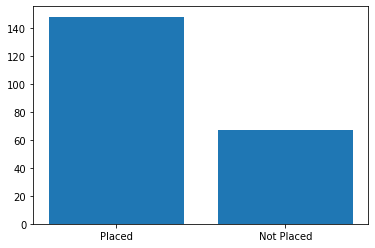

In [5]:
d={}
for i in data['status']:
    if i not in d:
        d[i]=1
    else:
        d[i]=d[i]+1
x=d.keys()
y=d.values()
plt.bar(x,y)
plt.show()

In [6]:
data=data.drop(columns=['sl_no'])

In [7]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            68
dtype: int64

In [59]:
data_train=pd.DataFrame(data)
print(data['hsc_b'].unique())
data_train['hsc_b']=LabelEncoder().fit_transform(data_train['hsc_b'])
print(data['ssc_b'].unique())
data_train['ssc_b']=LabelEncoder().fit_transform(data_train['ssc_b'])
print(data['hsc_s'].unique())
data_train['hsc_s']=LabelEncoder().fit_transform(data_train['hsc_s'])
print(data['degree_t'].unique())
data_train['degree_t']=LabelEncoder().fit_transform(data_train['degree_t'])
print(data['workex'].unique())
data_train['workex']=LabelEncoder().fit_transform(data_train['workex'])
print(data['specialisation'].unique())
data_train['specialisation']=LabelEncoder().fit_transform(data_train['specialisation'])
print(data['status'].unique())
data_train['status']=LabelEncoder().fit_transform(data_train['status'])
print(data['gender'].unique())
data_train['gender']=LabelEncoder().fit_transform(data_train['gender'])
data_train2=data_train
data_train2.describe()

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']
['M' 'F']


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,147.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.437209,62.278186,0.688372,288578.231293
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497199,5.833385,0.464240,93772.233906
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,240000.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000,265000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,300000.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [9]:
data_train.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,147.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.437209,62.278186,0.688372,288578.231293
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497199,5.833385,0.464240,93772.233906
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,240000.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000,265000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,300000.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [10]:
import seaborn as sns

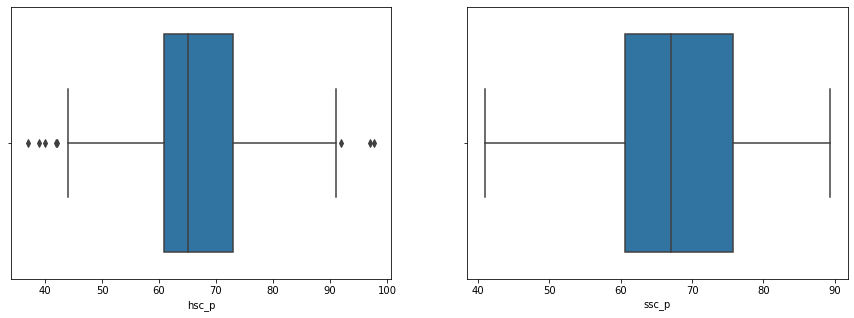

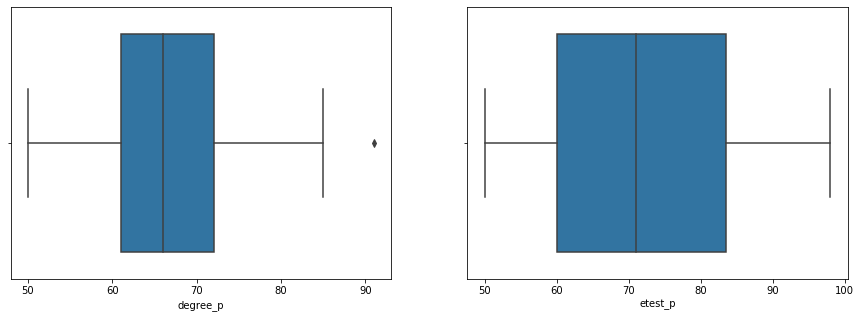

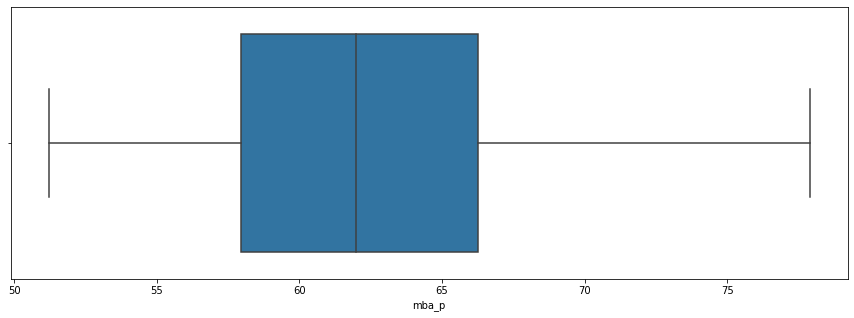

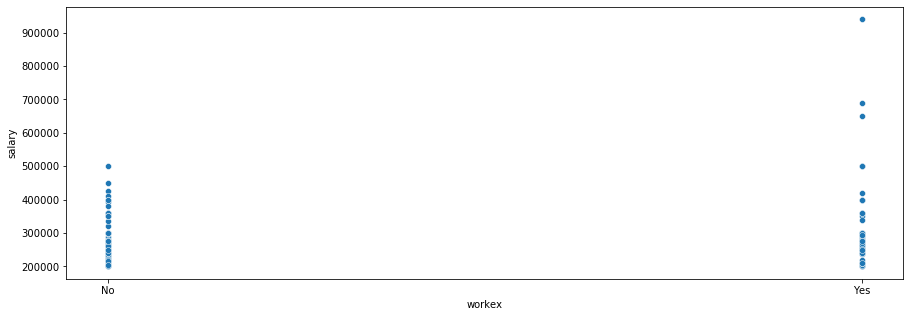

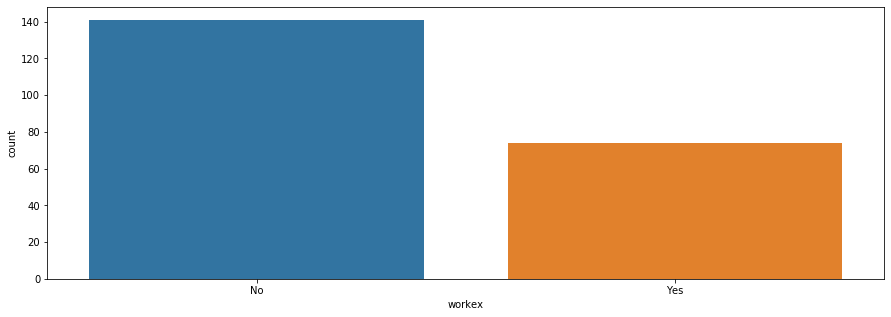

In [11]:
plt.rcParams['figure.figsize']=(15,5)
f,axes=plt.subplots(1,2)
sns.boxplot(x='hsc_p',data=data_train,ax=axes[0])
sns.boxplot(x='ssc_p',data=data_train)
plt.show()
f,axes=plt.subplots(1,2)
sns.boxplot(x='degree_p',data=data_train,ax=axes[0])
sns.boxplot(x='etest_p',data=data_train)
plt.show()
sns.boxplot(x='mba_p',data=data_train)
plt.show()
data.shape
sns.scatterplot(data=data,x='workex',y='salary')
plt.show()
sns.countplot(x='workex',data=data)

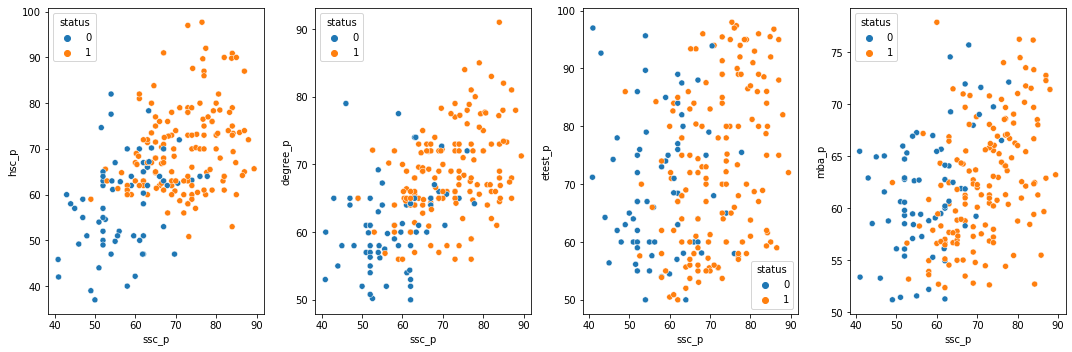

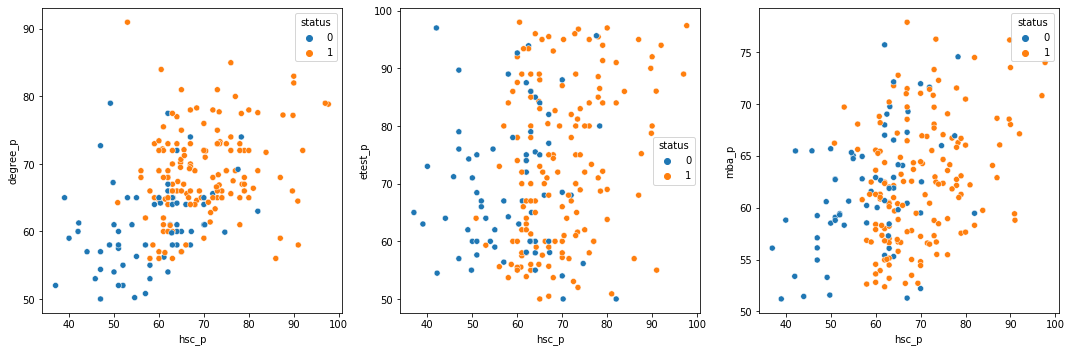

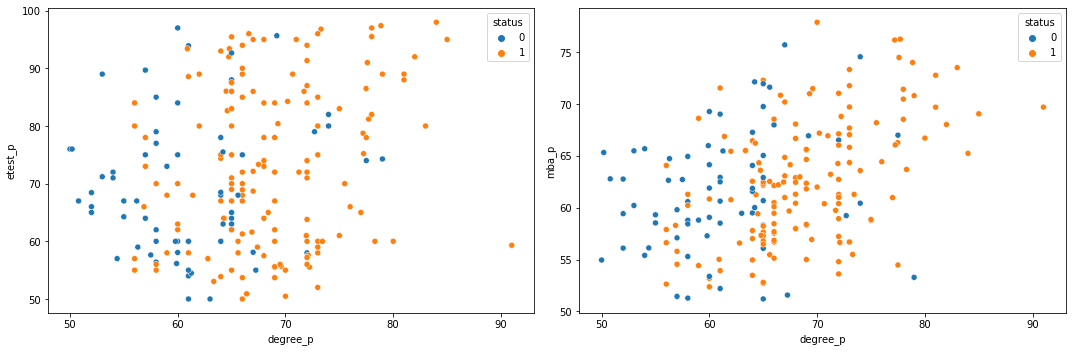

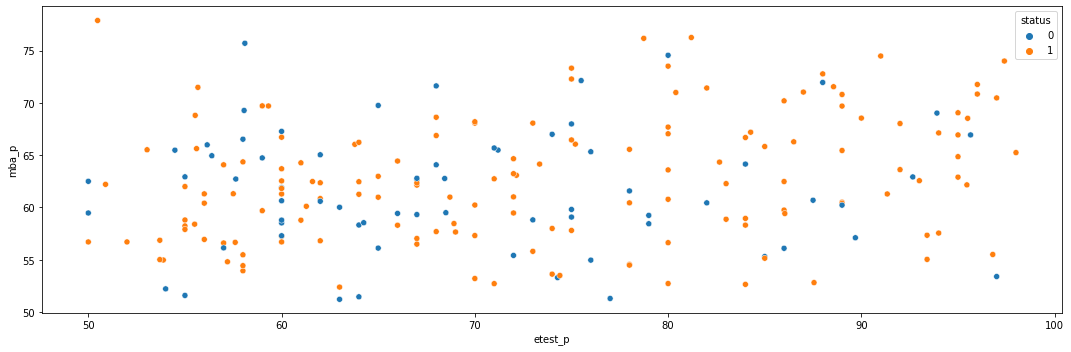

In [12]:
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams["figure.autolayout"] = True

f,axes=plt.subplots(1,4)
sns.scatterplot(data=data_train,x='ssc_p',y='hsc_p',hue='status',ax=axes[0])
sns.scatterplot(data=data_train,x='ssc_p',y='degree_p',hue='status',ax=axes[1])
sns.scatterplot(data=data_train,x='ssc_p',y='etest_p',hue='status',ax=axes[2])
sns.scatterplot(data=data_train,x='ssc_p',y='mba_p',hue='status',ax=axes[3])


plt.show()

f,axes=plt.subplots(1,3)
sns.scatterplot(data=data_train,x='hsc_p',y='degree_p',hue='status',ax=axes[0])
sns.scatterplot(data=data_train,x='hsc_p',y='etest_p',hue='status',ax=axes[1])
sns.scatterplot(data=data_train,x='hsc_p',y='mba_p',hue='status',ax=axes[2])
plt.show()

f,axes=plt.subplots(1,2)
sns.scatterplot(data=data_train,x='degree_p',y='etest_p',hue='status',ax=axes[0])
sns.scatterplot(data=data_train,x='degree_p',y='mba_p',hue='status',ax=axes[1])

plt.show()


sns.scatterplot(data=data_train,x='etest_p',y='mba_p',hue='status')


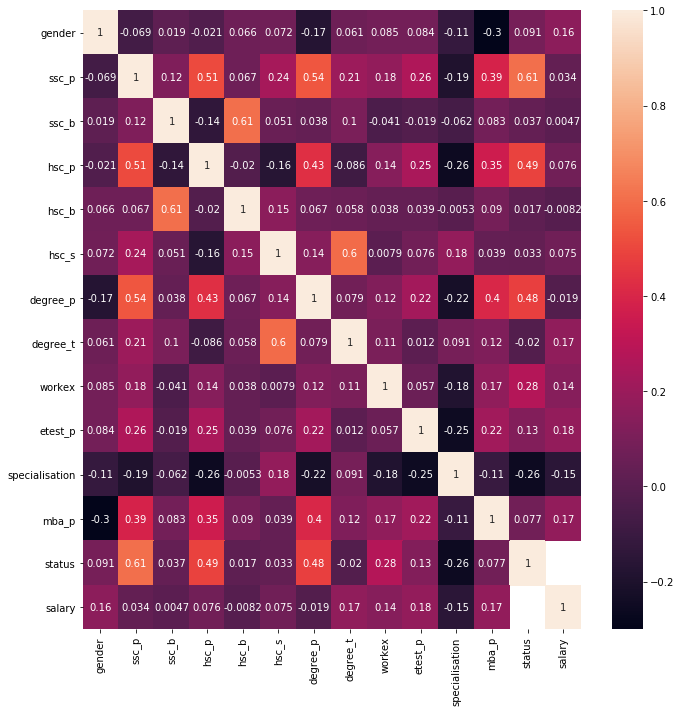

In [13]:
corr=data_train.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


## Converted specialisation attribute to marketing (week 3)

In [15]:
data_train=data_train.drop(columns=['gender','ssc_b','hsc_b','degree_t'])

## visualized hsc specialisation to find corelation with status

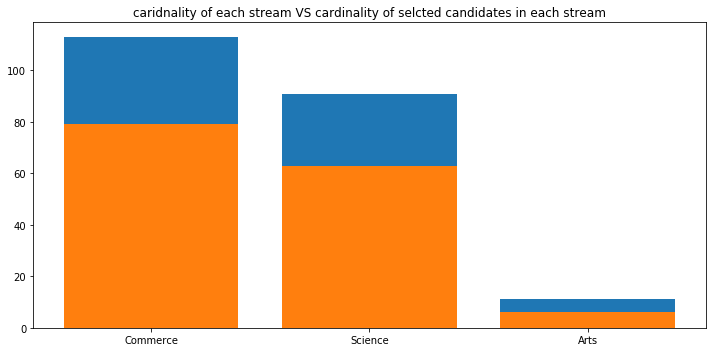

In [16]:
plt.figure(figsize=(10,5))
d={}
for i in data['hsc_s']:
    if i not in d:
        d[i]=1
    else:
        d[i]=d[i]+1
x=d.keys()
y=d.values()
plt.bar(x,y)
d={}
for i in range(len(data['hsc_s'])):
    if data['hsc_s'][i] not in d:
        d[data['hsc_s'][i]]=0
    if data['status'][i]=='Placed':
        d[data['hsc_s'][i]]=d[data['hsc_s'][i]]+1
x=d.keys()
y=d.values()
plt.title('caridnality of each stream VS cardinality of selcted candidates in each stream')
plt.bar(x,y)
plt.show()


In [17]:
data_train=data_train.drop(columns=['hsc_s'])
data_train
data_train=data_train.drop(columns=['salary'])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y=list(data_train['status'])
data_train

,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,0,55.0,1,58.80,1
1,79.33,78.33,77.48,1,86.5,0,66.28,1
2,65.00,68.00,64.00,0,75.0,0,57.80,1
3,56.00,52.00,52.00,0,66.0,1,59.43,0
4,85.80,73.60,73.30,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,91.0,0,74.49,1
211,58.00,60.00,72.00,0,74.0,0,53.62,1
212,67.00,67.00,73.00,1,59.0,0,69.72,1
213,74.00,66.00,58.00,0,70.0,1,60.23,1


In [19]:
reg_data_train=data_train.dropna(axis = 0)
reg_data_train

,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,0,55.0,1,58.80,1
1,79.33,78.33,77.48,1,86.5,0,66.28,1
2,65.00,68.00,64.00,0,75.0,0,57.80,1
3,56.00,52.00,52.00,0,66.0,1,59.43,0
4,85.80,73.60,73.30,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,91.0,0,74.49,1
211,58.00,60.00,72.00,0,74.0,0,53.62,1
212,67.00,67.00,73.00,1,59.0,0,69.72,1
213,74.00,66.00,58.00,0,70.0,1,60.23,1


In [20]:
x=data_train.drop(['status'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## KNN model

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review 

0.9069767441860465 4


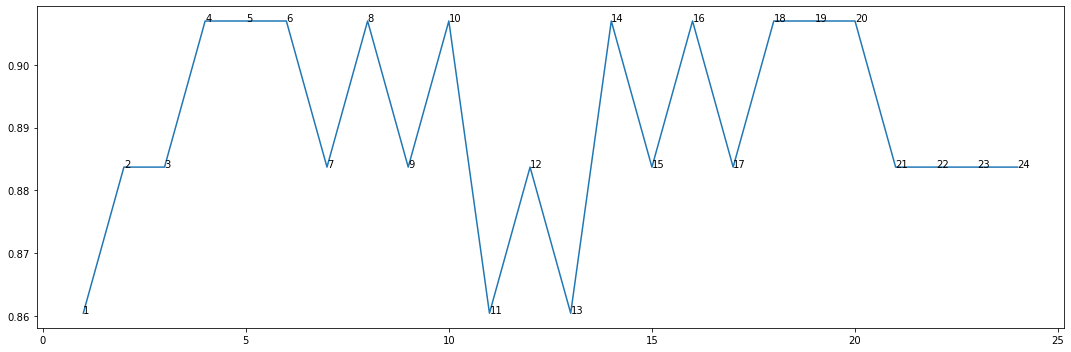

In [21]:
lst=[]
for i in range(1,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    a=model.score(x_test,y_test)
    lst.append(a) 
plt.plot([k for k in range(1,25)],lst)
for i in range(1,25):
    plt.annotate(i,xy=(i,lst[i-1]))
val=max(lst)
ind=lst.index(val)
print(val,ind+1)

In [22]:
model=KNeighborsClassifier(n_neighbors=ind+1)
model.fit(x_train,y_train)
acc=model.score(x_test,y_test)
print(acc*100)

90.69767441860465


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


##Prediction using KNN

In [23]:
para=[]
para2=[]
gender=float(input("Enter your Gender: \n 0. Male  1. Female \n"))
ssc_p=float(input("Enter SSC percentage: "))
hsc_p=float(input("Enter HSC percentage: "))
degree_p=float(input("Enter Degree percentage: "))
degree_t=float(input('Do you degree type:\n 0.Sci&Tech  1. Comm&Mgmt 2.Others\n'))
workex=int(input("Enter work eperience : \n 0. No  1. Yes\n"))
etest=float(input("Enter Entrance test percent: "))
special=int(input("Do you Specialisation in marketing: \n 0. No 1. Yes\n"))
mba_p=float(input("Enter MBA percentage: "))
para.append([ssc_p,hsc_p,degree_p,workex,etest,special,mba_p])
para2.append([gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest,special,mba_p])

Enter your Gender: 
 0. Male  1. Female 
 0
Enter SSC percentage:  80
Enter HSC percentage:  80
Enter Degree percentage:  80
Do you degree type:
 0.Sci&Tech  1. Comm&Mgmt 2.Others
 1
Enter work eperience : 
 0. No  1. Yes
 1
Enter Entrance test percent:  80
Do you Specialisation in marketing: 
 0. No 1. Yes
 1
Enter MBA percentage:  80


In [72]:
data_train2

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [57]:
from sklearn import linear_model
data_train2= data_train2.dropna(axis=0)
data_train2

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,58.00,2,0,55.0,1,58.80
1,1,79.33,78.33,77.48,2,1,86.5,0,66.28
2,1,65.00,68.00,64.00,0,0,75.0,0,57.80
4,1,85.80,73.60,73.30,0,0,96.8,0,55.50
7,1,82.00,64.00,66.00,2,1,67.0,0,62.14
...,...,...,...,...,...,...,...,...,...
209,1,62.00,72.00,65.00,0,0,67.0,0,56.49
210,1,80.60,82.00,77.60,0,0,91.0,0,74.49
211,1,58.00,60.00,72.00,2,0,74.0,0,53.62
212,1,67.00,67.00,73.00,0,1,59.0,0,69.72


In [55]:
#data_train2=data_train2.drop(columns=['ssc_b','hsc_b','hsc_s','status'],axis=1)
#y=data_train2['salary']
#data_train2=data_train2.drop(columns=['salary'],axis=1)
data_train2
data_train2.describe()

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.673469,71.617551,69.810408,68.745578,0.591837,0.435374,73.090000,0.353741,62.577211
std,0.470547,8.652717,9.253172,6.540082,0.897142,0.497501,13.657227,0.479765,5.904641
min,0.000000,49.000000,50.830000,56.000000,0.000000,0.000000,50.000000,0.000000,52.380000
25%,0.000000,65.000000,63.000000,65.000000,0.000000,0.000000,60.000000,0.000000,57.745000
50%,1.000000,72.000000,68.000000,68.000000,0.000000,0.000000,72.000000,0.000000,62.210000
75%,1.000000,77.835000,75.000000,72.615000,2.000000,1.000000,84.635000,1.000000,66.800000
max,1.000000,89.400000,97.700000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000


59438.562766460265


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


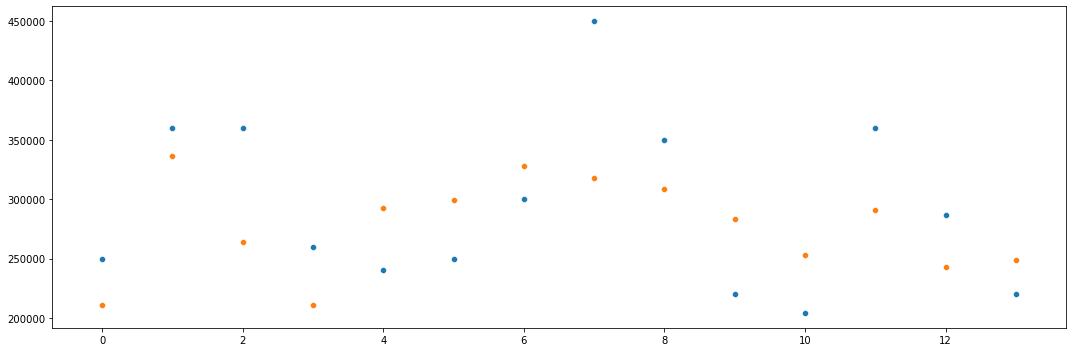

In [51]:
x_train2,x_test2,y_train2,y_test2=train_test_split(data_train2,y,test_size=0.1)
y_test3=list(y_test2)
regr = linear_model.LinearRegression()
regr.fit(x_train2,y_train2)
y_pred= regr.predict(x_test2)
z=0
a=[]
b=[]
for i in range(1,len(y_test3)) :
        a.append(y_pred[i])
        b.append(y_test3[i])
        z+=(y_pred[i]-y_test3[i])**2
z=(z/len(y_test3))**0.5
print(z)
sns.scatterplot([i for i in range(len(b))],b)
sns.scatterplot([i for i in range(len(a))],a)

In [48]:
if special==0:
    pred=0
elif special==1:
    if workex>3:
        pred=1
    else:
        pred=model.predict(para)

if pred==0:
    print("Not Placed")
else:
    print("Placed")
    y_prediction =  regr.predict(para2)
    print("Salary : ",y_prediction[0])


Placed
Salary :  309763.2720235002
